# Analysis and Model creation for the German Credit Scoring Dataset

Dataset: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data
<br>

### Attribute 1:  (qualitative)
 Status of existing checking account
- A11 :      ... <    0 DM
- A12 : 0 <= ... <  200 DM
- A13 :      ... >= 200 DM / salary assignments for at least 1 year
- A14 : no checking account

### Attribute 2:  (numerical)

Duration in month

### Attribute 3:  (qualitative)

Credit history 
- A30 : no credits taken/ all credits paid back duly
- A31 : all credits at this bank paid back duly 
- A32 : existing credits paidx back duly till now
- A33 : delay in paying off in the past
- A34 : critical account/  other credits existing (not at this bank)

### Attribute 4:  (qualitative)

Purpose
- A40 : car (new)
- A41 : car (used)
- A42 : furniture/equipment
- A43 : radio/television
- A44 : domestic appliances
- A45 : repairs
- A46 : education
- A47 : (vacation - does not exist?)
- A48 : retraining
- A49 : business
- A410 : others

### Attribute 5: (numerical)
Credit amount

### Attribute 6: (qualitative)
Savings account/bonds
- A61: ... < 100 DM
- A62: 100 <= ... < 500 DM
- A63: 500 <= ... < 1000 DM
- A64: .. >= 1000 DM
- A65: unknown/ no savings account

### Attribute 7: (qualitative)
Present employment since
- A71: unemployed
- A72: ... < 1 year
- A73: 1 <= ... < 4 years
- A74: 4 <= ... < 7 years
- A75: .. >= 7 years

### Attribute 8: (numerical)
Installment rate in percentage of disposable income

### Attribute 9: (qualitative)
Personal status and sex
- A91: male: divorced/separated
- A92: female: divorced/separated/married
- A93: male: single
- A94: male: married/widowed
- A95: female: single

### Attribute 10: (qualitative)
Other debtors / guarantors
- A101: none
- A102: co-applicant
- A103: guarantor

### Attribute 11: (numerical)
Present residence since

### Attribute 12: (qualitative)
Property
- A121: real estate
- A122: if not A121: building society savings agreement/ life insurance
- A123: if not A121/A122: car or other, not in attribute 6
- A124: unknown / no property

### Attribute 13: (numerical)
Age in years

### Attribute 14: (qualitative)
Other installment plans
- A141: bank
- A142: stores
- A143: none

### Attribute 15: (qualitative)
Housing
- A151: rent
- A152: own
- A153: for free

### Attribute 16: (numerical)
Number of existing credits at this bank

### Attribute 17: (qualitative)
Job
- A171: unemployed/ unskilled - non-resident
- A172: unskilled - resident
- A173: skilled employee / official
- A174: management/ self-employed/ highly qualified employee/ officer

### Attribute 18: (numerical)
Number of people being liable to provide maintenance for

### Attribute 19: (qualitative)
Telephone
- A191: none
- A192: yes, registered under the customer's name

### Attribute 20: (qualitative)
Foreign worker
- A201: yes
- A202: no

Import dataset from uc api:


In [4]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 

ConnectionError: Error connecting to server

In [20]:
from ucimlrepo import list_available_datasets 

list_available_datasets()


ConnectionError: Error connecting to server

In [ ]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


## Decode the table for EDA

In [ ]:
from utils import decode_data

# Set the column names
X = X.set_axis(decode_data.decoded_columns, axis=1)

# Create a pandas dataframe of the dictionary
mapping_table = pd.DataFrame(list(decode_data.code_mapping.items()), columns=['Code', 'Meaning'])

# Convert the code_mapping to a series for easier replacement
mapping_series = pd.Series(decode_data.code_mapping)

# Replace the values in each column
decoded_df = X.replace(mapping_series)

# Add credit scores
df = pd.concat([decoded_df, y], axis=1)
new_column_name = 'Credit_Score'
df = df.rename(columns={df.columns[-1]: new_column_name})

# Convert 1 - 2 scoring into Binary
# 0 For Bad 1 For Good
df['Credit_Score'].replace(2, 0, inplace=True)

df.head()

/var/folders/2c/z3p48tbs7ts01ct6t7gpsh3c0000gn/T/ipykernel_64275/782505604.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_Score'].replace(2, 0, inplace=True)


,Checking_Account_Status,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Personal_Status_Sex,Other_Debtors_Guarantors,...,Property,Age_Years,Other_Installment_Plans,Housing,Number_Credits,Job,Number_Liable_People,Telephone,Foreign_Worker,Credit_Score
0,smaller 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/no savings account,greater_equal 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,smaller 200 DM,48,existing credits paid back duly till now,radio/television,5951,smaller 100 DM,smaller 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,no checking account,12,critical account/other credits existing (not a...,education,2096,smaller 100 DM,smaller 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,smaller 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,smaller 100 DM,smaller 7 years,2,male : single,guarantor,...,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,smaller 0 DM,24,delay in paying off in the past,car (new),4870,smaller 100 DM,smaller 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee / official,2,none,yes,0


In [ ]:
#Seperate the relationship status and gender

pattern = r'(?P<Sex>male|female) : (?P<Relationship_Status>.+)'

# Extracting Sex and Relationship Status into new columns
extracted_data = df['Personal_Status_Sex'].str.extract(pattern)

# Now add these new columns back to your original DataFrame
df['Sex'] = extracted_data['Sex']
df['Relationship_Status'] = extracted_data['Relationship_Status']

# Optionally, you may want to drop the original 'Personal_Status_Sex' column
df = df.drop(columns=['Personal_Status_Sex'])

df.head()

,Checking_Account_Status,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Other_Debtors_Guarantors,Residence_Since,...,Other_Installment_Plans,Housing,Number_Credits,Job,Number_Liable_People,Telephone,Foreign_Worker,Credit_Score,Sex,Relationship_Status
0,smaller 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/no savings account,greater_equal 7 years,4,none,4,...,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1,male,single
1,smaller 200 DM,48,existing credits paid back duly till now,radio/television,5951,smaller 100 DM,smaller 4 years,2,none,2,...,none,own,1,skilled employee / official,1,none,yes,0,female,divorced/separated/married
2,no checking account,12,critical account/other credits existing (not a...,education,2096,smaller 100 DM,smaller 7 years,2,none,3,...,none,own,1,unskilled - resident,2,none,yes,1,male,single
3,smaller 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,smaller 100 DM,smaller 7 years,2,guarantor,4,...,none,for free,1,skilled employee / official,2,none,yes,1,male,single
4,smaller 0 DM,24,delay in paying off in the past,car (new),4870,smaller 100 DM,smaller 4 years,3,none,4,...,none,for free,2,skilled employee / official,2,none,yes,0,male,single


# EDA

In [ ]:
df["Checking_Account_Status"].value_counts()

Checking_Account_Status
no checking account     394
smaller 0 DM            274
smaller 200 DM          269
greater_equal 200 DM     63
Name: count, dtype: int64

In [ ]:
df['Credit_Score'].value_counts()

Credit_Score
1    700
0    300
Name: count, dtype: int64

In [ ]:
pivot_table = df.pivot_table(index='Purpose', columns='Credit_Score', aggfunc='size', fill_value=0)
pivot_table

Credit_Score,0,1
Purpose,,
business,34,63
car (new),89,145
car (used),17,86
domestic appliances,4,8
education,22,28
furniture/equipment,58,123
others,5,7
radio/television,62,218
repairs,8,14


In [ ]:
pivot_table = df.pivot_table(index=['Duration_Months'], columns='Credit_Score', aggfunc='size', fill_value=0)
pivot_table

Credit_Score,0,1
Duration_Months,,
4,0,6
5,0,1
6,9,66
7,0,5
8,1,6
9,14,35
10,3,25
11,0,9
12,49,130


There could be several reasons why these applications are regarded as good:

Risk-Based Pricing: The bank may be using risk-based pricing strategies where they offer credit to individuals with a higher risk profile but at a higher interest rate. This compensates for the increased risk while expanding their customer base.

Comprehensive Credit Assessment: The bank may have a more comprehensive credit assessment system that looks beyond just the existence of a critical account. Other factors such as income, employment stability, assets, savings, or even improvements in recent financial behavior could contribute positively to an applicant's credit score.

Market Positioning and Strategy: The bank might be aiming to increase its market share or enter a new market segment. By accepting customers with less-than-perfect credit histories, the bank could be trying to position itself as more inclusive and willing to offer a second chance to individuals who have faced financial difficulties in the past.

Successful Rehabilitation: Some of those with critical accounts might have demonstrated a significant improvement in their financial behavior. For example, they might have settled their previously outstanding debts or shown a consistent pattern of responsible financial behavior in recent times.

Data Limitations: The classification as 'good' might be due to limitations in the data. For instance, the bank might not have a long enough credit history for these customers, or there might be missing variables that are not accounted for in the dataset.

Competition and Customer Acquisition: In highly competitive markets, banks might be more willing to take on higher-risk customers to expand their customer base, especially if they have strategies in place to manage and mitigate these risks.



### Risky Customers

In [ ]:
risky_customers = df[df['Credit_History'] == 'critical account/other credits existing (not at this bank)']
pivot_table = risky_customers.pivot_table(index=['Purpose'], columns='Credit_Score', aggfunc='size', fill_value=0)
pivot_table

Credit_Score,0,1
Purpose,,
business,2,17
car (new),19,59
car (used),4,32
domestic appliances,0,1
education,6,13
furniture/equipment,10,40
others,1,2
radio/television,7,73
repairs,1,5


In [ ]:
pivot_table = risky_customers.pivot_table(index=['Housing','Other_Debtors_Guarantors'], columns='Credit_Score', aggfunc='size', fill_value=0)
pivot_table

Credit_Score                        0    1
Housing  Other_Debtors_Guarantors         
for free none                       7   23
own      co-applicant               2    7
         guarantor                  2    7
         none                      29  179
rent     co-applicant               2    2
         guarantor                  2    1
         none                       6   24

# Model Development

### Using Cramer's V to see which variables are havily associated with target variable

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Analyze each categorical feature
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Credit_Score':  # Assuming 'target' is your binary target variable
        chi2, p, dof, expected = chi2_contingency(pd.crosstab(df[col], df['Credit_Score']))
        cramers_v_value = cramers_v(df[col], df['Credit_Score'])
        print(f"Feature: {col}, Chi2 p-value: {p}, Cramér's V: {cramers_v_value}")


Feature: Checking_Account_Status, Chi2 p-value: 1.2189020722893845e-26, Cramér's V: 0.3476189010590424
Feature: Credit_History, Chi2 p-value: 1.2791872956750962e-12, Cramér's V: 0.24030230119486998
Feature: Purpose, Chi2 p-value: 0.00011574910079691586, Cramér's V: 0.1561148105809381
Feature: Savings_Account, Chi2 p-value: 2.761214238568249e-07, Cramér's V: 0.1792402952214944
Feature: Employment_Since, Chi2 p-value: 0.0010454523491402541, Cramér's V: 0.11991106245316734
Feature: Other_Debtors_Guarantors, Chi2 p-value: 0.036055954027247206, Cramér's V: 0.06817636837744627
Feature: Property, Chi2 p-value: 2.8584415733250017e-05, Cramér's V: 0.14400453584964393
Feature: Other_Installment_Plans, Chi2 p-value: 0.0016293178186473534, Cramér's V: 0.10415394681626367
Feature: Housing, Chi2 p-value: 0.00011167465374597684, Cramér's V: 0.12733448032933792
Feature: Job, Chi2 p-value: 0.5965815918843431, Cramér's V: 0.0
Feature: Telephone, Chi2 p-value: 0.2788761543035742, Cramér's V: 0.0131045576

/var/folders/2c/z3p48tbs7ts01ct6t7gpsh3c0000gn/T/ipykernel_64275/557510844.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.02941176 0.64705882 0.11764706 0.55882353 0.29411765 0.47058824
 0.29411765 0.47058824 0.11764706 0.38235294 0.11764706 0.64705882
 0.11764706 0.29411765 0.16176471 0.29411765 0.29411765 0.38235294
 0.29411765 0.29411765 0.07352941 0.02941176 0.08823529 0.11764706
 0.08823529 0.02941176 0.02941176 0.11764706 0.04411765 0.82352941
 0.20588235 0.29411765 0.20588235 0.11764706 0.11764706 0.60294118
 0.64705882 0.20588235 0.08823529 0.07352941 0.38235294 0.11764706
 0.20588235 0.38235294 0.64705882 0.10294118 0.47058824 0.02941176
 0.10294118 0.11764706 0.29411765 0.33823529 0.11764706 0.20588235
 0.47058824 0.02941176 0.11764706 0.47058824 0.20588235 0.47058824
 0.07352941 0.16176471 0.47058824 0.64705882 0.29411765 0.33823529
 0.11764706 0.11764706 0.47058824 0.47058824 0.47058824 0.04411

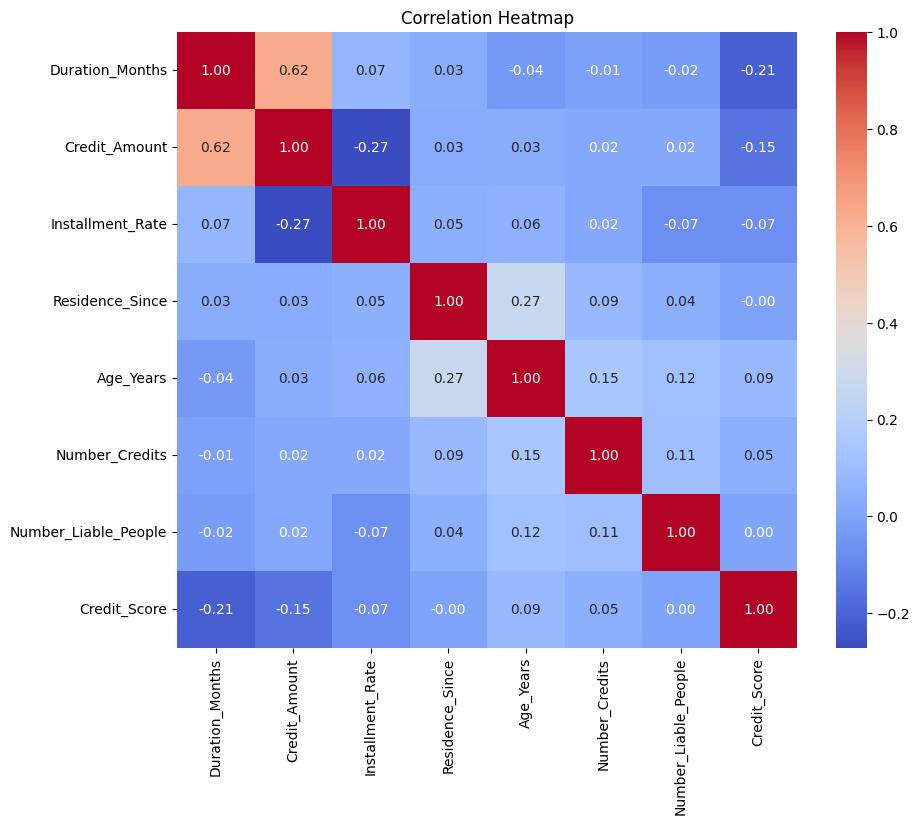

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Select numeric columns (excluding the target variable if it's categorical)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Dataframe with only continues variables
df_numeric = df.loc[:,numeric_cols] 

# Normalize the numeric columns using Min-Max scaling
scaler = MinMaxScaler()
df_numeric.loc[:] = scaler.fit_transform(df_numeric)

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()




There is a strong relationship with credit amount and duration months. Since we will use tree based model, multicollinearity is not a main concern.

From numeric columns following columns can be discarded since they have a 0 correlation:
* Number_liable_people
* Residence_Since

From the Discrete variables, following columns can be discarded since they have a failry low V values:
* Job, Chi2 p-value: 0.5965815918843431, Cramér's V: 0.0
* Telephone, Chi2 p-value: 0.2788761543035742, Cramér's V: 0.013104557655738326
* Other_Debtors_Guarantors, Chi2 p-value: 0.036055954027247206, Cramér's V: 0.06817636837744627

In [18]:
df = df.loc[: ,['Foreign_Worker', 'Sex', 'Checking_Account_Status', 'Duration_Months', 'Credit_History',
       'Purpose', 'Credit_Amount', 'Savings_Account', 'Employment_Since',
       'Installment_Rate','Property', 'Age_Years', 'Other_Installment_Plans', 'Housing',
       'Number_Credits', 'Relationship_Status']]

In [19]:
df.dtypes

Foreign_Worker             object
Sex                        object
Checking_Account_Status    object
Duration_Months             int64
Credit_History             object
Purpose                    object
Credit_Amount               int64
Savings_Account            object
Employment_Since           object
Installment_Rate            int64
Property                   object
Age_Years                   int64
Other_Installment_Plans    object
Housing                    object
Number_Credits              int64
Relationship_Status        object
dtype: object

In [20]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import re

y['class'].replace(2, 0, inplace=True)

X = pd.get_dummies(df, columns=['Checking_Account_Status', 'Credit_History', 'Purpose', 'Savings_Account', 'Employment_Since', 'Property', 'Other_Installment_Plans', 'Housing', 'Foreign_Worker', 'Sex', 'Relationship_Status' ])

# Split your data into train, temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=15)

# Split temp data further to validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=15)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_val.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_val.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

regex = re.compile(r"\[|\]|<", re.IGNORECASE)


/var/folders/2c/z3p48tbs7ts01ct6t7gpsh3c0000gn/T/ipykernel_64275/1934112083.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y['class'].replace(2, 0, inplace=True)
/var/folders/2c/z3p48tbs7ts01ct6t7gpsh3c0000gn/T/ipykernel_64275/1934112083.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'].replace(2, 0, inplace=True)


In [21]:
X.dtypes

Duration_Months                                                              int64
Credit_Amount                                                                int64
Installment_Rate                                                             int64
Age_Years                                                                    int64
Number_Credits                                                               int64
Checking_Account_Status_greater_equal 200 DM                                  bool
Checking_Account_Status_no checking account                                   bool
Checking_Account_Status_smaller 0 DM                                          bool
Checking_Account_Status_smaller 200 DM                                        bool
Credit_History_all credits at this bank paid back duly                        bool
Credit_History_critical account/other credits existing (not at this bank)     bool
Credit_History_delay in paying off in the past                                bool
Cred

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [25, 15, 20, 30, 40],
    'max_depth': [2, 3],
    'learning_rate': [0.05, 0.15, 0.1, 0.2]
}

# replace the bad credit scores of 2 to 0

# We have very limited data, I am adding the validation set to the train set
X_GS_set = pd.concat([X_train, X_val], axis= 0)
y_GS_set = pd.concat([y_train, y_val], axis= 0)

# Initialize the XGBClassifier
model = xgb.XGBClassifier(objective='binary:logistic')

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the GridSearchCV
grid_search.fit(X_GS_set, y_GS_set)

# Get the best parameters and score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Score: {best_score}")

Fitting 3 folds for each of 40 candidates, totalling 120 fits


ValueError: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/sklearn.py", line 1500, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/sklearn.py", line 521, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/sklearn.py", line 958, in _create_dmatrix
    return QuantileDMatrix(
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/core.py", line 1529, in __init__
    self._init(
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/core.py", line 1588, in _init
    it.reraise()
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/core.py", line 576, in reraise
    raise exc  # pylint: disable=raising-bad-type
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/core.py", line 557, in _handle_exception
    return fn()
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/core.py", line 641, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/data.py", line 1280, in next
    input_data(**self.kwargs)
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/core.py", line 624, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/data.py", line 1315, in _proxy_transform
    arr, feature_names, feature_types = _transform_pandas_df(
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/data.py", line 490, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "/Users/melihberkayaydin/Desktop/Programming/python-projects/germ-credit-class/credit-scoring/lib/python3.10/site-packages/xgboost/data.py", line 308, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Other_Debtors_Guarantors: object, Job: object, Telephone: object


In [22]:
from sklearn.metrics import accuracy_score

#model = xgb.XGBClassifier(reg_lambda = 0.1, learning_rate= 0.2, max_depth = 2, n_estimators = 20, objective='binary:logistic')
model = xgb.XGBClassifier(reg_lambda = 0.1, learning_rate= 0.2, max_depth = 2, n_estimators = 20, objective='binary:logistic')
model.fit(X_train, y_train)

#Training set Accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred),
print(f"Training Set Accuracy: {train_accuracy}")

# Make predictions on the test set
y_val_pred = model.predict(X_val)

# Calculate the accuracy on the training set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Set Accuracy: {val_accuracy}")

Training Set Accuracy: (0.7933333333333333,)
Validation Set Accuracy: 0.785


In [23]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy}")

Test Set Accuracy: 0.735


In [28]:
model.feature_importances_

array([0.06401125, 0.04301883, 0.05140087, 0.0509602 , 0.        ,
       0.        , 0.2020897 , 0.03349604, 0.        , 0.        ,
       0.05863887, 0.0271986 , 0.        , 0.        , 0.        ,
       0.07944896, 0.02779698, 0.        , 0.        , 0.        ,
       0.        , 0.04016984, 0.        , 0.        , 0.        ,
       0.06620222, 0.04129793, 0.        , 0.03567412, 0.        ,
       0.        , 0.        , 0.02676302, 0.        , 0.        ,
       0.        , 0.03650322, 0.        , 0.        , 0.04175741,
       0.0484175 , 0.        , 0.        , 0.        , 0.02515437,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ], dtype=float32)

In [40]:
y_test_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1])

In [57]:
model.predict(X_test.iloc[[2]])

array([0])

In [59]:
X_test.iloc[2]

Duration_Months                                                                 36
Credit_Amount                                                                 1842
Installment_Rate                                                                 4
Age_Years                                                                       34
Number_Credits                                                                   1
Checking_Account_Status_greater_equal 200 DM                                 False
Checking_Account_Status_no checking account                                  False
Checking_Account_Status_smaller 0 DM                                          True
Checking_Account_Status_smaller 200 DM                                       False
Credit_History_all credits at this bank paid back duly                       False
Credit_History_critical account/other credits existing (not at this bank)    False
Credit_History_delay in paying off in the past                               False
Cred

In [38]:
model.predict()

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:429: object

In [33]:
model.feature_importances_[6]
model.feature_names_in_[6]

'Checking_Account_Status_no checking account'

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_val)  # Replace X_val with your validation or test data

fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()




: 

In [1]:
model.save_model('xgb_class.json')

NameError: name 'model' is not defined

In [6]:
import xgboost as xgb

model_path = './xgb_class.json'  # Update this to the path of your JSON model file
bst = xgb.Booster()  # Initialize an empty model
bst.load_model(model_path)  # Load the model from the JSON file

In [9]:
importance = bst.get_score(importance_type='weight')
for i in importance: 
    print(i, importance[i])

Duration_Months 7.0
Credit_Amount 14.0
Installment_Rate 3.0
Age_Years 4.0
Checking_Account_Status_no checking account 6.0
Checking_Account_Status_smaller 0 DM 2.0
Credit_History_critical account/other credits existing (not at this bank) 4.0
Credit_History_delay in paying off in the past 1.0
Purpose_car (new) 1.0
Purpose_car (used) 2.0
Purpose_radio/television 2.0
Savings_Account_smaller 100 DM 2.0
Savings_Account_smaller 1000 DM 2.0
Savings_Account_unknown/no savings account 2.0
Employment_Since_smaller 7 years 1.0
Property_real estate 2.0
Other_Installment_Plans_none 2.0
Other_Installment_Plans_stores 1.0
Foreign_Worker_no 1.0
